# 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
d=pd.read_excel("data.xlsx",sheet_name=1)
d

,L,C0,C1,C,T,Tt
0,0.1,1.205975e-09,1.000000e-09,2.205975e-09,0.000093,0.000093
1,0.1,1.205975e-09,2.000000e-09,3.205975e-09,0.000112,0.000113
2,0.1,1.205975e-09,3.000000e-09,4.205975e-09,0.000127,0.000129
3,0.1,1.205975e-09,4.000000e-09,5.205975e-09,0.000144,0.000143
4,0.1,1.205975e-09,5.000000e-09,6.205975e-09,0.000156,0.000157
5,0.1,1.205975e-09,6.000000e-09,7.205975e-09,0.000168,0.000169
6,0.1,1.205975e-09,7.000000e-09,8.205975e-09,0.000179,0.000180
7,0.1,1.205975e-09,8.000000e-09,9.205975e-09,0.000191,0.000191
8,0.1,1.205975e-09,9.000000e-09,1.020598e-08,0.000201,0.000201


In [3]:
d2=pd.read_excel("data.xlsx",sheet_name=4)
d2

,nu,2U,U,T
0,6500,205.0,20.50,0.000031
1,6400,205.0,20.50,0.000038
2,6300,193.0,19.30,0.000045
3,6200,172.0,17.20,0.000051
4,6100,147.0,14.70,0.000057
5,6000,129.0,12.90,0.000062
6,5900,107.0,10.70,0.000065
7,5800,93.0,9.30,0.000069
8,5700,81.0,8.10,0.000072
9,5600,71.0,7.10,0.000074


In [4]:
d6=pd.read_excel("data.xlsx",sheet_name=6)
d6

,nu,l,R
0,50,0.09998,21.5
1,1000,0.09996,22.2
2,5000,0.10070,32.5
3,20000,0.11360,270.0


In [5]:
dth=pd.read_excel("data.xlsx",sheet_name=2)
dth

,n,R,U,Un,thet,Rf,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1,408.25,2.84,1.96,0.370860,472.888372,64.638372,0.054227,0.041529,8.471111,8.569913
1,2,408.25,2.84,1.36,0.368160,469.457509,61.207509,0.045824,0.034524,8.533234,8.569913
2,3,408.25,2.84,0.94,0.368560,469.966001,61.716001,0.047069,0.035569,8.523970,8.569913
3,2,500.00,2.66,1.10,0.441508,562.565798,62.565798,0.040132,0.031224,7.115597,7.165825
4,2,750.00,2.28,0.66,0.619845,787.924593,37.924593,-0.006101,-0.008980,5.068348,4.954150
5,2,1000.00,1.99,0.36,0.854893,1082.014024,82.014024,0.039514,0.034208,3.674838,3.785719
6,2,1250.00,1.74,0.22,1.034006,1303.241573,53.241573,0.008593,0.006324,3.038272,3.063253
7,1,1500.00,1.52,0.43,1.262680,1581.250188,81.250188,0.025833,0.022925,2.488035,2.572347
8,1,1750.00,1.32,0.30,1.481605,1841.985236,91.985236,0.028277,0.025508,2.120399,2.217051
9,1,2000.00,1.14,0.20,1.740466,2142.477578,142.477578,0.049989,0.045498,1.805029,1.947991


In [6]:
def getkb(X,Y):
    k=(np.average(Y*X)-np.average(Y)*np.average(X))/(np.average(X*X)-np.average(X)**2)
    b=np.average(Y)-k*np.average(X)
    def av(n):
        return np.average(n)
    sigk=np.sqrt(np.abs((av(Y*Y)-av(Y)*av(Y))/(av(X*X)-av(X)**2) - k*k))/np.sqrt(X.shape[0])
    #print((av(Y*Y)-av(Y)*av(Y))/(av(X*X)-av(X)**2) - k*k)
    sigb=sigk*np.sqrt(av(X*X)-av(X)**2)
    return np.array([k,b,np.abs(sigk/k),np.abs(sigb/b)])

In [7]:
a,b,sa,sb=getkb((d['Tt']),(d['T']))
a,b,sa,sb

(np.float64(1.0061397640178735),
 np.float64(-1.3366369258814234e-06),
 np.float64(0.006676272873954619),
 np.float64(0.17212412780013595))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


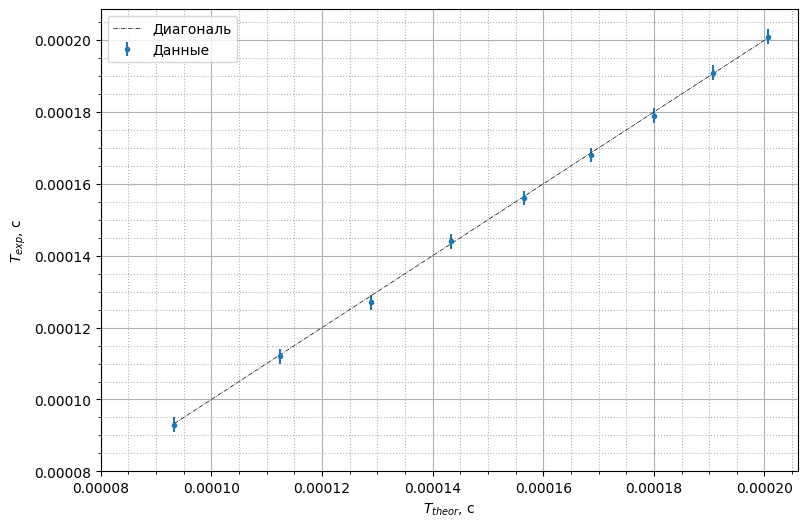

In [8]:
fig,ax = plt.subplots(figsize=(9,6))
ax.errorbar(d['Tt'],d['T'],fmt='.', yerr=2e-6, label="Данные")
ax.plot(d['Tt'],d['Tt'],'-.', c='black',linewidth=0.5,label="Диагональ")
ax.minorticks_on()
ax.grid(which='major')
ax.grid(which='minor', linestyle=':')
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylim(ymin=plt.gca().get_yticks()[0])
ax.set_xlim(xmin=plt.gca().get_xticks()[0])
#ax.set_xticks([5,6,7,8,9,10])
ax.set_xlabel("$T_{theor}$, c")
ax.set_ylabel("$T_{exp}$, c")
ax.legend()
fig.savefig("ts.eps")

In [9]:
nukr=6500

In [10]:
def RL(nukr):
    return 0.0000006855*nukr*nukr - 0.0013154608*nukr+22.1146166636


In [11]:
RL(6500)

42.5264964636

In [12]:
Rl=60

In [24]:
20/408

0.049019607843137254

In [13]:
a,b,sa,sb=getkb(1/(dth.R+Rl)**2,1/dth.thet**2)
a,b,sa,sb

(np.float64(1614862.4163786762),
 np.float64(-0.01616875805440765),
 np.float64(0.006547325933016175),
 np.float64(1.187848571540888))

In [26]:
2*np.pi*np.sqrt(a)*1.003

np.float64(8008.451778863316)

In [27]:
2**31

2147483648

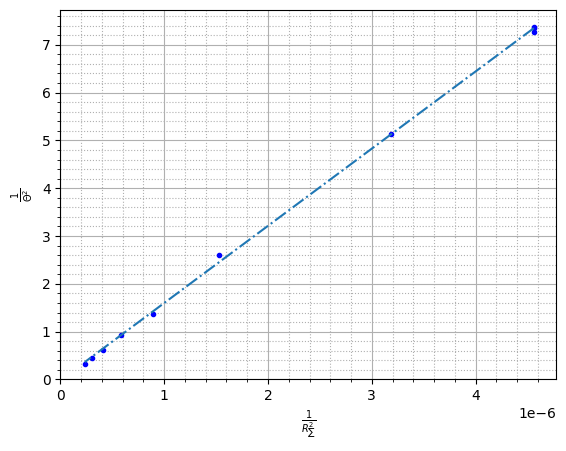

In [23]:
plt.plot(1/(dth.R+Rl)**2, 1/dth.thet**2, '.b')
plt.plot(1/(dth.R+Rl)**2, a/(dth.R+Rl)**2+b, '-.')
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.ylim(ymin=plt.gca().get_yticks()[1])
plt.xlim(xmin=plt.gca().get_xticks()[0])
plt.xlabel(r"$\frac{1}{R_\sum^2}$")
plt.ylabel(r"$\frac{1}{\Theta^2}$")
plt.savefig("R.eps")

In [36]:
200/6500

0.03076923076923077

In [16]:
U0=20.5
nu0=6500

8.333333333333327 0.1200000000000001


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


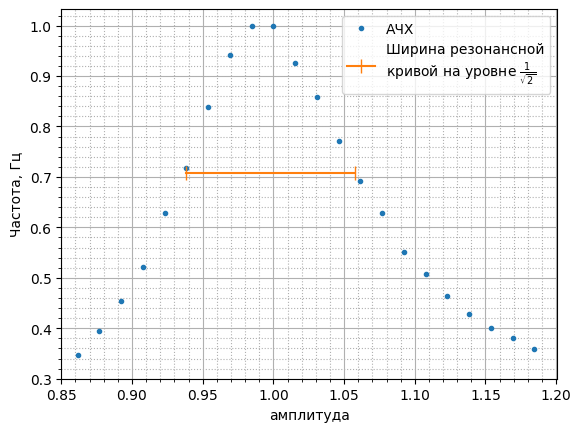

In [35]:
plt.plot(d2['nu']/nu0,d2['U']/U0,'.', label="АЧХ")
plt.plot([0.938,1.058],[1/np.sqrt(2)]*2, marker='|', markersize=10, label="Ширина резонансной\n"+r"кривой на уровне $\frac{1}{\sqrt{2}}$")
print(1/(1.058-0.938),1.058-0.938)
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.ylim(ymin=plt.gca().get_yticks()[0])
plt.xlim(xmin=plt.gca().get_xticks()[1])
plt.xlabel("амплитуда")
plt.ylabel(r"Частота, Гц")
plt.legend()
plt.savefig('achh.eps')

In [21]:
(-d2['T']*d2['nu']*2*np.pi)[0],d2['nu'][0],-np.pi/2

(np.float64(-1.2578936984973532), np.int64(6500), -1.5707963267948966)

8.208333333333341 0.11999999999999988


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


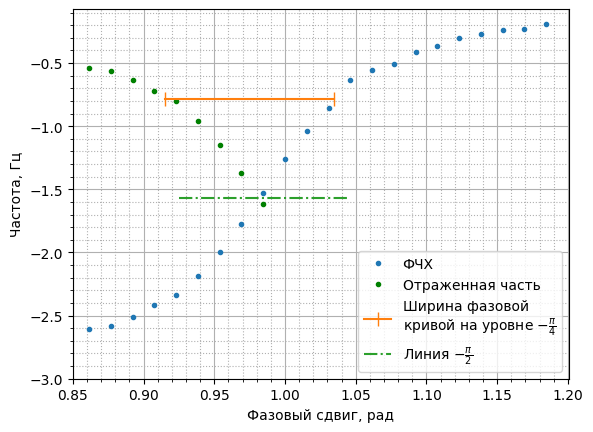

In [49]:
plt.plot(d2['nu']/nu0,-d2['T']*d2['nu']*2*np.pi,'.', label="ФЧХ")
p2=np.array([np.array([d2['nu'][i]/nu0, d2['T'][i]*d2['nu'][i]*2*np.pi-np.pi]) for i in range(len(d2['nu'])) if d2['nu'][i]<=nu0-100])
#plt.plot(d2['nu']/nu0, np.atan((2*np.pi*d2['nu']*0.1-1/(2*np.pi*d2['nu']*6.21e-9))/468.2)-np.pi/2, 'x', label="должно")
plt.plot(np.rot90(p2)[1],np.rot90(p2)[0],'.g', label="Отраженная часть")
plt.plot([0.915,1.035],[-np.pi/4]*2, '|-', markersize=10,label="Ширина фазовой\n"+r"кривой на уровне $-\frac{\pi}{4}$")
print(0.985/(1.035-0.915),1.035-0.915)
plt.plot([0.985-0.06,0.985+0.06],[-np.pi/2]*2,'-.',label=r"Линия $-\frac{\pi}{2}$")
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.ylim(ymin=plt.gca().get_yticks()[0])
plt.xlim(xmin=plt.gca().get_xticks()[1])
plt.xlabel("Фазовый сдвиг, рад")
plt.ylabel(r"Частота, Гц")
plt.legend()
plt.savefig('fchh.eps')

In [ ]:
a'/a^2

In [50]:
0.99/0.12

8.25